# YAPAY ZEKA PROJE 2 BANKA MÜŞTERİSİ TERK TAHMİN MODELİ VE ANALİZİ

In [1]:
import warnings
warnings.simplefilter("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("ChurnModeling.csv")

In [4]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [5]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1 )

## EDA

In [6]:
def dataframeInformations(df):
  totalEntryList=[]
  totalMissingValueList=[]
  missingValRateList=[]
  dataTypeList=[]
  uniqueValuesList=[]
  totalUniqueValList=[]
  variableNameList=[]
  
  for element in df.columns:
    missingValRate=round((df[element].isna().sum()/len(df[element]))*100,2) #to show correct decimal and float part of number.
    totalEntryList.append(len(df[element]))
    totalMissingValueList.append(df[element].isna().sum())
    missingValRateList.append(missingValRate)
    dataTypeList.append(df[element].dtype)
    uniqueValuesList.append(list(df[element].unique()))
    totalUniqueValList.append(len(df[element].unique()))
    variableNameList.append(element)
  #create a dataframe to show all informations together
  dataInfoDf=pd.DataFrame({'Variable':variableNameList,'#_Total_Entry':totalEntryList,\
                           '#_Missing_Value':totalMissingValueList,'%_Missing_Value':missingValRateList,\
                           'Data_Type':dataTypeList,'Unique_Values':uniqueValuesList,\
                           '#_Uniques_Values':totalUniqueValList})
  return dataInfoDf.sort_values(by="Variable")

In [7]:
dataInfo=dataframeInformations(df)
variableList=[element for element in dataInfo['Variable'] ]
dataInfo=dataInfo.set_index('Variable')
dataInfo

,#_Total_Entry,#_Missing_Value,%_Missing_Value,Data_Type,Unique_Values,#_Uniques_Values
Variable,,,,,,
Age,10000,0,0.0,int64,"[42, 41, 39, 43, 44, 50, 29, 27, 31, 24, 34, 2...",70
Balance,10000,0,0.0,float64,"[0.0, 83807.86, 159660.8, 125510.82, 113755.78...",6382
CreditScore,10000,0,0.0,int64,"[619, 608, 502, 699, 850, 645, 822, 376, 501, ...",460
EstimatedSalary,10000,0,0.0,float64,"[101348.88, 112542.58, 113931.57, 93826.63, 79...",9999
Exited,10000,0,0.0,int64,"[1, 0]",2
Gender,10000,0,0.0,object,"[Female, Male]",2
Geography,10000,0,0.0,object,"[France, Spain, Germany]",3
HasCrCard,10000,0,0.0,int64,"[1, 0]",2
IsActiveMember,10000,0,0.0,int64,"[1, 0]",2


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


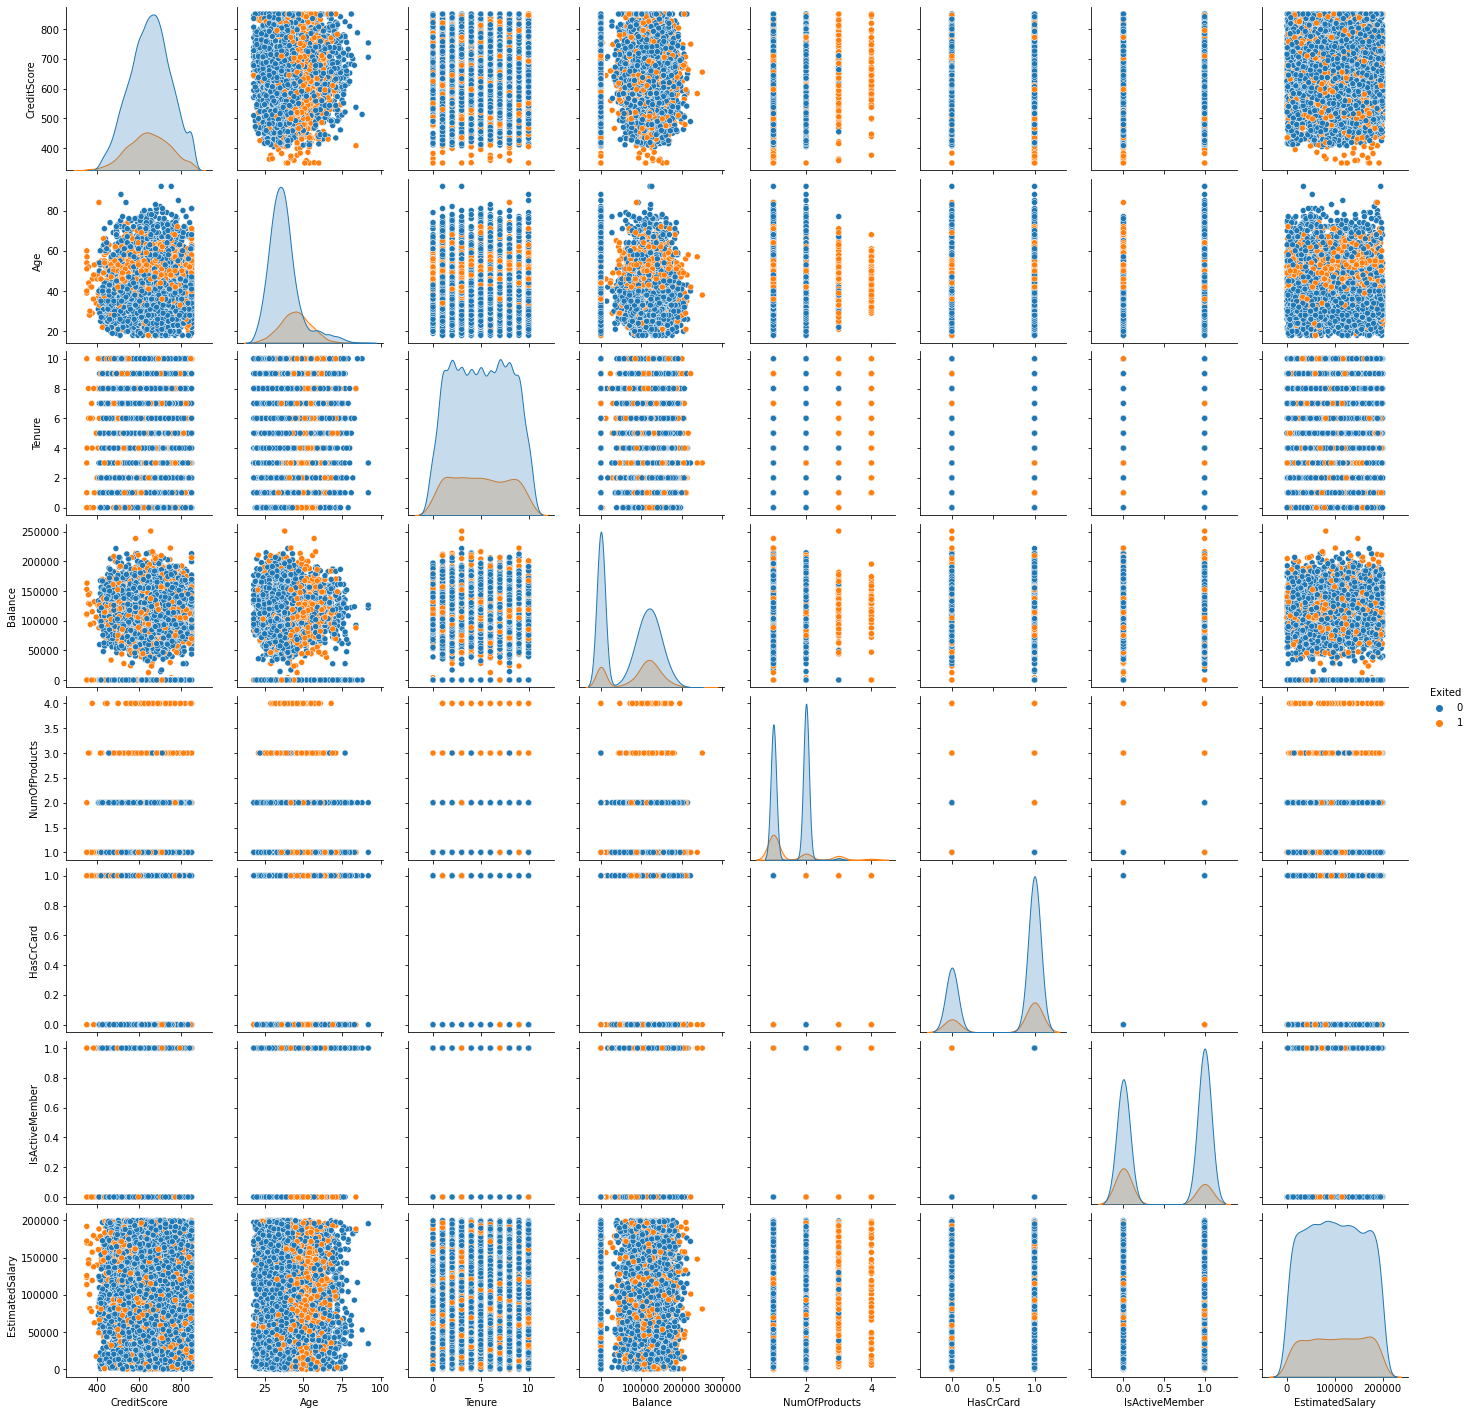

In [9]:
sns.pairplot(df, hue = 'Exited')

<AxesSubplot:xlabel='IsActiveMember', ylabel='Count'>

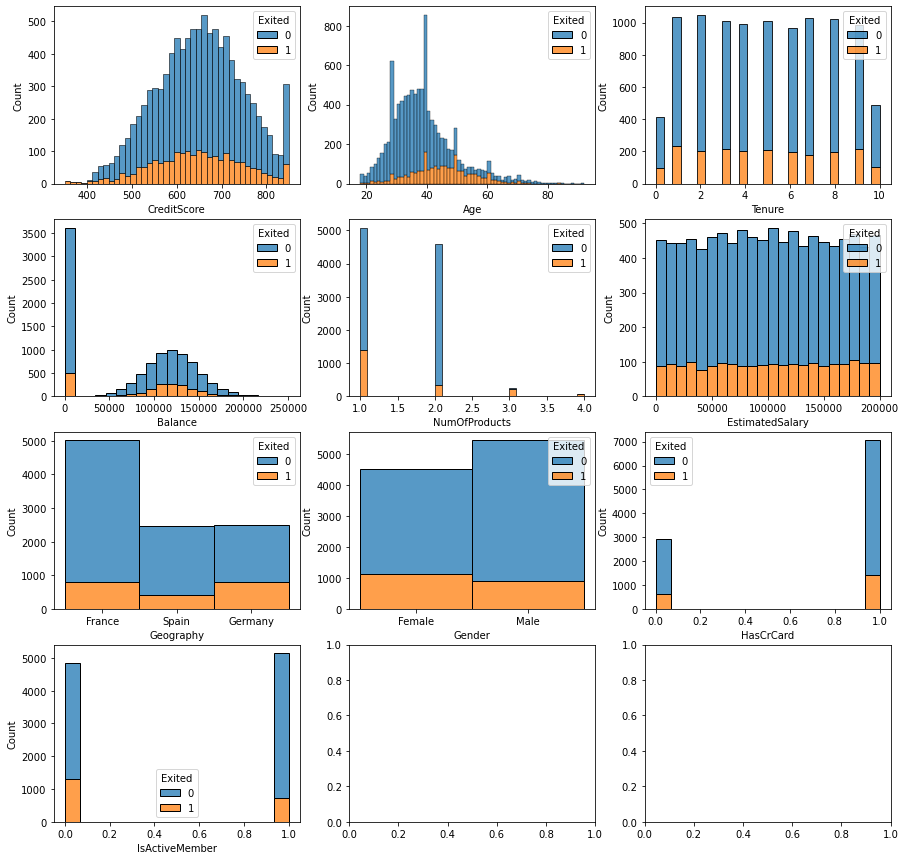

In [10]:
fig, axes = plt.subplots(4, 3, figsize=(15,15))
sns.histplot(ax=axes[0, 0], data=df, x="CreditScore", hue="Exited", multiple="stack")
sns.histplot(ax=axes[0, 1], data=df, x='Age', hue="Exited", multiple="stack")
sns.histplot(ax=axes[0, 2], data=df, x='Tenure', hue="Exited", multiple="stack")
sns.histplot(ax=axes[1, 0], data=df, x='Balance', hue="Exited", multiple="stack")
sns.histplot(ax=axes[1, 1], data=df, x='NumOfProducts', hue="Exited", multiple="stack")
sns.histplot(ax=axes[1, 2], data=df, x='EstimatedSalary', hue="Exited", multiple="stack")
sns.histplot(ax=axes[2, 0], data=df, x='Geography', hue="Exited", multiple="stack")
sns.histplot(ax=axes[2, 1], data=df, x='Gender', hue="Exited", multiple="stack")
sns.histplot(ax=axes[2, 2], data=df, x='HasCrCard', hue="Exited", multiple="stack")
sns.histplot(ax=axes[3, 0], data=df, x='IsActiveMember', hue="Exited", multiple="stack")

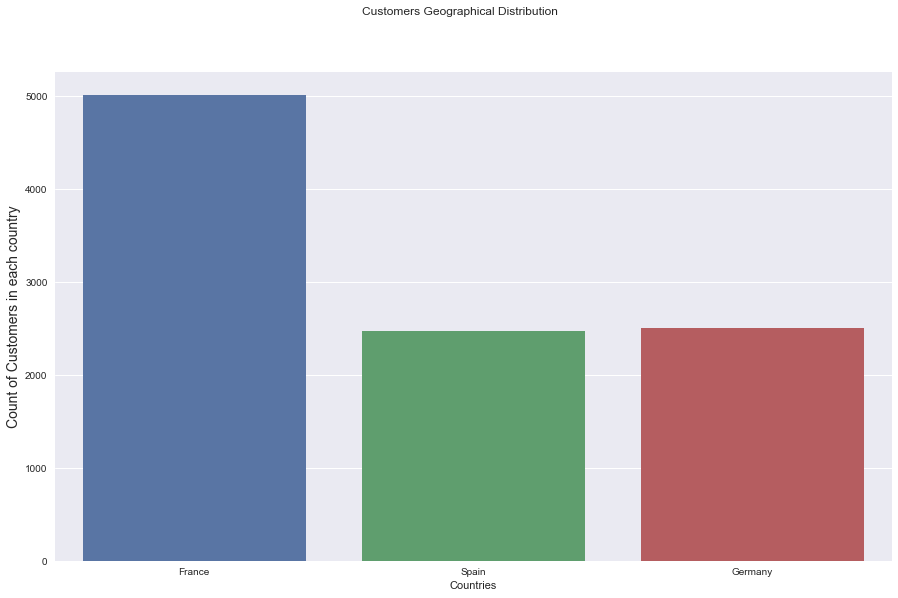

In [11]:
plt.style.use('seaborn')
plt.figure(figsize=(15,9))
plt.suptitle("Customers Geographical Distribution")
sns.countplot(x="Geography", data = df)
plt.xlabel("Countries",)
plt.ylabel("Count of Customers in each country", size = 14)
plt.show()

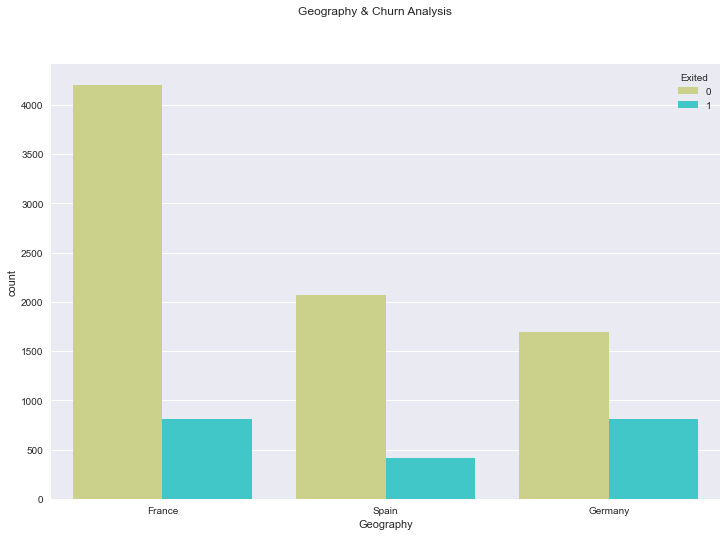

In [12]:
plt.figure(figsize=(12,8))
plt.suptitle("Geography & Churn Analysis")
sns.countplot(x='Geography', hue='Exited', data=df, palette="rainbow_r");

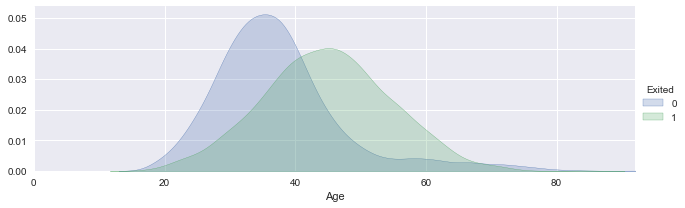

In [13]:
facet = sns.FacetGrid(df, hue="Exited", aspect=3)
facet.map(sns.kdeplot,"Age", shade = True)
facet.set(xlim = (0, df["Age"].max()))
facet.add_legend()

plt.show()

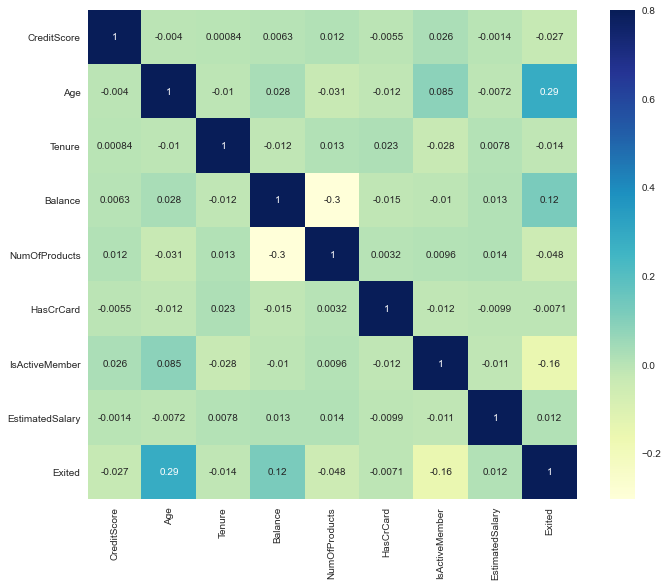

In [14]:
corrmatrix = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
ax = sns.heatmap(corrmatrix, vmax=.8, square=True, annot=True, cmap="YlGnBu")

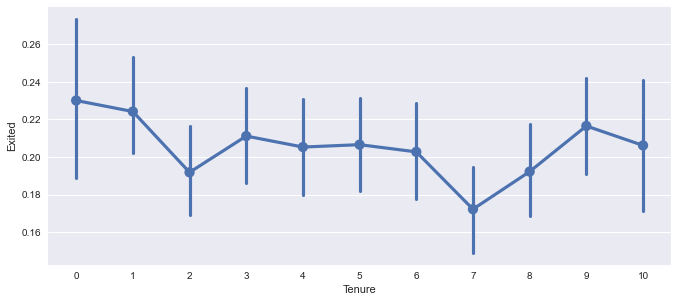

In [15]:
sns.factorplot('Tenure','Exited',data=df[['Tenure','Exited']])
fig=plt.gcf()
fig.set_size_inches(10,4)
plt.show()

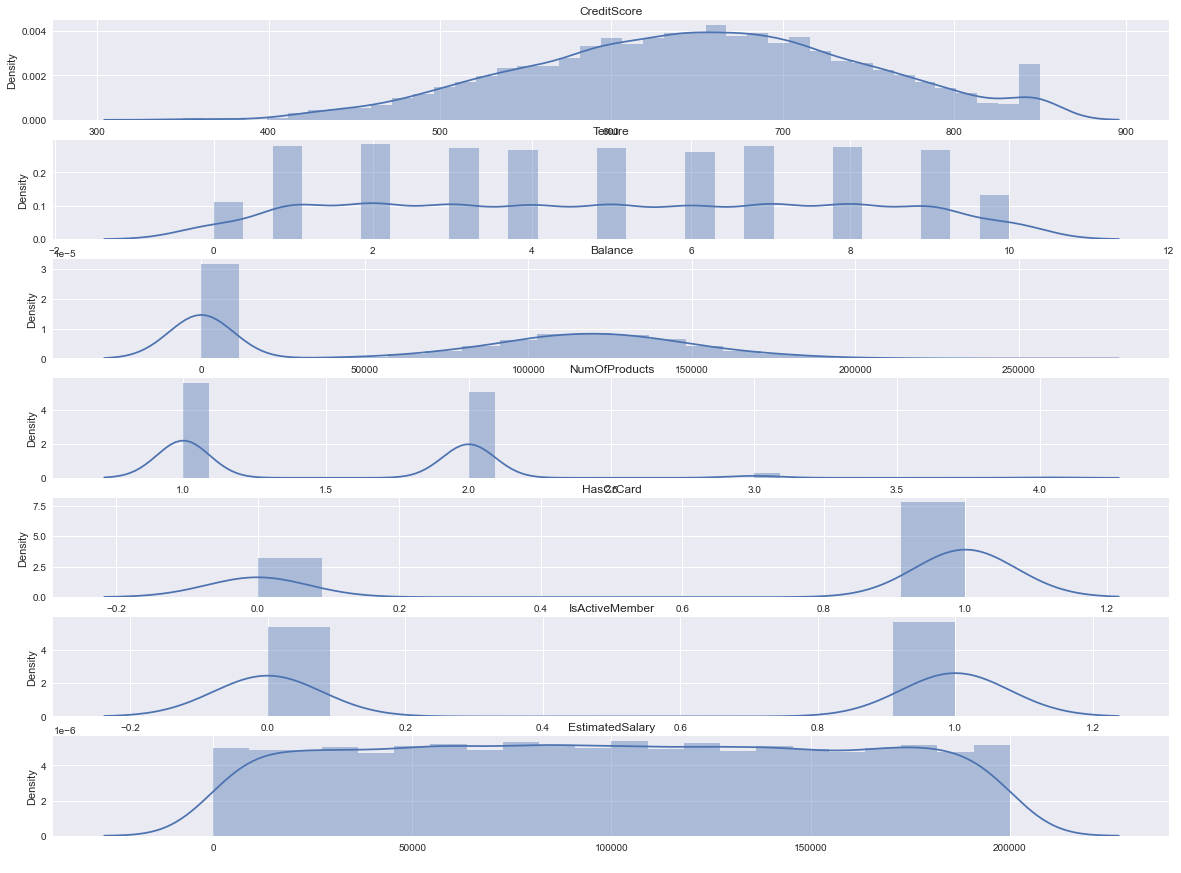

In [16]:
f,axes=plt.subplots(7,1,figsize=(20,15))                                   
sns.distplot(df['CreditScore'],ax=axes[0]).set_title('CreditScore')                                                                
sns.distplot(df['Tenure'],ax=axes[1]).set_title('Tenure')                              
sns.distplot(df['Balance'],ax=axes[2]).set_title('Balance')        
sns.distplot(df['NumOfProducts'],ax=axes[3]).set_title('NumOfProducts')
sns.distplot(df['HasCrCard'],ax=axes[4]).set_title('HasCrCard') 
sns.distplot(df['IsActiveMember'],ax=axes[5]).set_title('IsActiveMember')
sns.distplot(df['EstimatedSalary'],ax=axes[6]).set_title('EstimatedSalary')
axes[6].set_xlabel('       ')
plt.show()

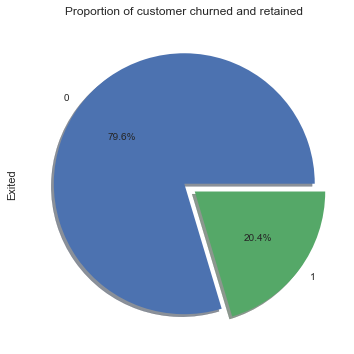

0    7963
1    2037
Name: Exited, dtype: int64

In [17]:
value_counts = pd.value_counts(df['Exited'])
plt.figure(figsize = (6,6))
value_counts.plot(kind = 'pie', explode = [0,0.1],autopct='%1.1f%%', shadow=True)
plt.title('Proportion of customer churned and retained')
plt.show()
value_counts

Target üzerindeki imbalanced yapı gereği sentetik oversampling uygulayacağım

## PREPROCESSING

In [18]:
def one_hot(df, cols):
    for each in cols:
        dummies = pd.get_dummies(df[each], prefix=each, drop_first=False)
        df = pd.concat([df, dummies], axis=1)
    return df

In [19]:
one_hot(df, ['Gender','Geography'])
df.drop(['Gender','Geography'],axis=1,inplace=True)

In [20]:
from sklearn.model_selection import train_test_split

X = df.drop('Exited',axis=1)
y = df['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [21]:
from imblearn.over_sampling import SMOTE

smt = SMOTE()

X_train, y_train = smt.fit_sample(X_train, y_train)

In [22]:
y_train.value_counts()

0    6356
1    6356
Name: Exited, dtype: int64

In [23]:
y_test.value_counts()

0    1607
1     393
Name: Exited, dtype: int64

In [24]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## MODEL KURUMLARI VE KARŞILAŞTIRILMASI

In [25]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [26]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier().fit(X_train, y_train)

scores_rf = cross_val_score(model_rf, X_test, y_test, cv=10)

print("%0.2f accuracy with a standard deviation of %0.2f" % (scores_rf.mean(), scores_rf.std()))

0.85 accuracy with a standard deviation of 0.01


In [27]:
y_pred_rf = cross_val_predict(model_rf, X_test, y_test, cv=10)

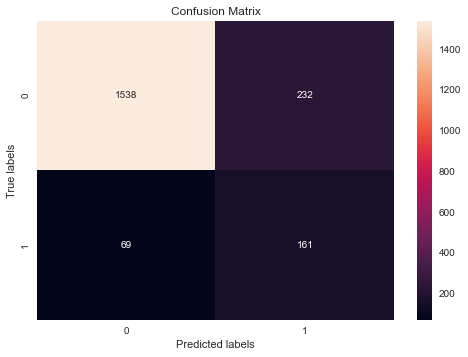

In [28]:
from sklearn.metrics import confusion_matrix
conf_nb = confusion_matrix(y_pred_rf,y_test)
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(conf_nb, fmt='d', annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['0', '1']); ax.yaxis.set_ticklabels(['0', '1']);

In [29]:
from sklearn.naive_bayes import GaussianNB

model_gnb = GaussianNB().fit(X_train, y_train)

scores_gnb = cross_val_score(model_gnb, X_test, y_test, cv=10)

print("%0.2f accuracy with a standard deviation of %0.2f" % (scores_gnb.mean(), scores_gnb.std()))

0.82 accuracy with a standard deviation of 0.01


In [30]:
y_pred_gnb = cross_val_predict(model_gnb, X_test, y_test, cv=10)

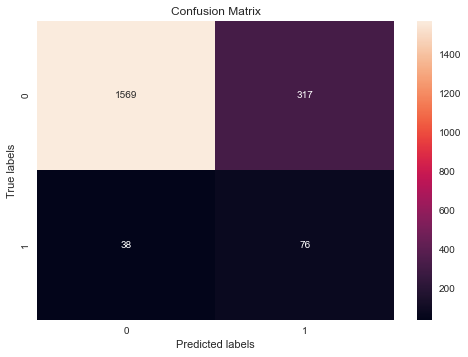

In [31]:
from sklearn.metrics import confusion_matrix
conf_nb = confusion_matrix(y_pred_gnb,y_test)
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(conf_nb, fmt='d', annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['0', '1']); ax.yaxis.set_ticklabels(['0', '1']);

In [32]:
from sklearn.svm import SVC

model_svc = SVC().fit(X,y)

scores_svc = cross_val_score(model_svc, X_test, y_test, cv=10)

print("%0.2f accuracy with a standard deviation of %0.2f" % (scores_svc.mean(), scores_svc.std()))

0.85 accuracy with a standard deviation of 0.01


In [33]:
y_pred_svc = cross_val_predict(model_svc, X_test, y_test, cv=10)

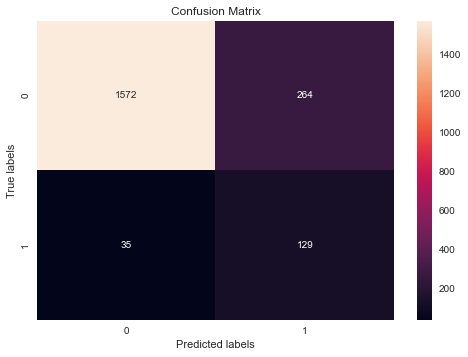

In [34]:
from sklearn.metrics import confusion_matrix
conf_nb = confusion_matrix(y_pred_svc,y_test)
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(conf_nb, fmt='d', annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['0', '1']); ax.yaxis.set_ticklabels(['0', '1']);

In [35]:
from xgboost import XGBClassifier

model_xgb = XGBClassifier().fit(X_train, y_train)

scores_xgb = cross_val_score(model_xgb, X_test, y_test, cv=10)

print("%0.2f accuracy with a standard deviation of %0.2f" % (scores_xgb.mean(), scores_xgb.std()))

[23:01:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:01:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:01:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:01:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [36]:
y_pred_xgb = cross_val_predict(model_xgb, X_test, y_test, cv=10)

[23:01:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:01:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:01:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:01:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

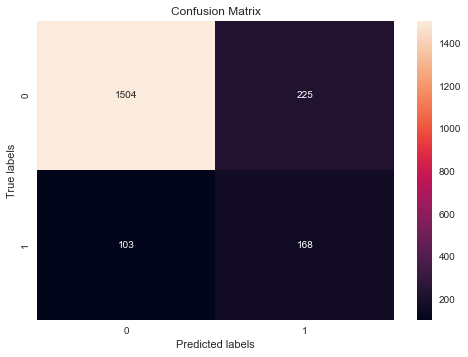

In [37]:
from sklearn.metrics import confusion_matrix
conf_nb = confusion_matrix(y_pred_xgb,y_test)
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(conf_nb, fmt='d', annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['0', '1']); ax.yaxis.set_ticklabels(['0', '1']);

In [38]:
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
from sklearn.metrics import accuracy_score

In [39]:
space={'max_depth': hp.quniform("max_depth", 3, 18, 1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 180,
        'seed': 0
    }

def objective(space):
    clf=XGBClassifier(
                    n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                    reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                    colsample_bytree=int(space['colsample_bytree']))
    
    evaluation = [( X_train, y_train), ( X_test, y_test)]
    
    clf.fit(X_train, y_train,
            eval_set=evaluation, eval_metric="auc",
            early_stopping_rounds=10,verbose=False)
    

    pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred>0.5)
    print ("SCORE:", accuracy)
    return {'loss': -accuracy, 'status': STATUS_OK }

trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 500,
                        trials = trials)

best_hyperparams



SCORE:                                                                                                                 
0.761                                                                                                                  
SCORE:                                                                                                                 
0.771                                                                                                                  
SCORE:                                                                                                                 
0.7655                                                                                                                 
SCORE:                                                                                                                 
0.7745                                                                                                                 
SCORE:                                  

SCORE:                                                                                                                 
0.769                                                                                                                  
SCORE:                                                                                                                 
0.773                                                                                                                  
SCORE:                                                                                                                 
0.7655                                                                                                                 
SCORE:                                                                                                                 
0.7695                                                                                                                 
SCORE:                                  

SCORE:                                                                                                                 
0.7775                                                                                                                 
SCORE:                                                                                                                 
0.779                                                                                                                  
SCORE:                                                                                                                 
0.774                                                                                                                  
SCORE:                                                                                                                 
0.773                                                                                                                  
SCORE:                                  

SCORE:                                                                                                                 
0.768                                                                                                                  
SCORE:                                                                                                                 
0.776                                                                                                                  
SCORE:                                                                                                                 
0.7715                                                                                                                 
SCORE:                                                                                                                 
0.7735                                                                                                                 
SCORE:                                  

SCORE:                                                                                                                 
0.7705                                                                                                                 
SCORE:                                                                                                                 
0.7715                                                                                                                 
SCORE:                                                                                                                 
0.7625                                                                                                                 
SCORE:                                                                                                                 
0.7775                                                                                                                 
SCORE:                                  

SCORE:                                                                                                                 
0.7665                                                                                                                 
SCORE:                                                                                                                 
0.766                                                                                                                  
SCORE:                                                                                                                 
0.778                                                                                                                  
SCORE:                                                                                                                 
0.7695                                                                                                                 
SCORE:                                  

SCORE:                                                                                                                 
0.7665                                                                                                                 
SCORE:                                                                                                                 
0.773                                                                                                                  
SCORE:                                                                                                                 
0.771                                                                                                                  
SCORE:                                                                                                                 
0.769                                                                                                                  
SCORE:                                  

SCORE:                                                                                                                 
0.7735                                                                                                                 
SCORE:                                                                                                                 
0.773                                                                                                                  
SCORE:                                                                                                                 
0.7685                                                                                                                 
SCORE:                                                                                                                 
0.768                                                                                                                  
SCORE:                                  

SCORE:                                                                                                                 
0.7715                                                                                                                 
SCORE:                                                                                                                 
0.7715                                                                                                                 
SCORE:                                                                                                                 
0.769                                                                                                                  
SCORE:                                                                                                                 
0.7745                                                                                                                 
SCORE:                                  

SCORE:                                                                                                                 
0.766                                                                                                                  
SCORE:                                                                                                                 
0.7665                                                                                                                 
SCORE:                                                                                                                 
0.766                                                                                                                  
SCORE:                                                                                                                 
0.769                                                                                                                  
SCORE:                                  

SCORE:                                                                                                                 
0.766                                                                                                                  
SCORE:                                                                                                                 
0.774                                                                                                                  
SCORE:                                                                                                                 
0.7665                                                                                                                 
SCORE:                                                                                                                 
0.776                                                                                                                  
SCORE:                                  

SCORE:                                                                                                                 
0.768                                                                                                                  
SCORE:                                                                                                                 
0.778                                                                                                                  
SCORE:                                                                                                                 
0.7635                                                                                                                 
SCORE:                                                                                                                 
0.77                                                                                                                   
SCORE:                                  

SCORE:                                                                                                                 
0.774                                                                                                                  
SCORE:                                                                                                                 
0.773                                                                                                                  
SCORE:                                                                                                                 
0.7675                                                                                                                 
SCORE:                                                                                                                 
0.7745                                                                                                                 
SCORE:                                  

SCORE:                                                                                                                 
0.7725                                                                                                                 
SCORE:                                                                                                                 
0.7675                                                                                                                 
SCORE:                                                                                                                 
0.78                                                                                                                   
SCORE:                                                                                                                 
0.773                                                                                                                  
SCORE:                                  

SCORE:                                                                                                                 
0.774                                                                                                                  
SCORE:                                                                                                                 
0.78                                                                                                                   
SCORE:                                                                                                                 
0.7725                                                                                                                 
SCORE:                                                                                                                 
0.768                                                                                                                  
SCORE:                                  

{'colsample_bytree': 0.7819286513797343,
 'gamma': 7.608192280333872,
 'max_depth': 8.0,
 'min_child_weight': 5.0,
 'reg_alpha': 113.0,
 'reg_lambda': 0.5058163769841749}

In [41]:
model_hyperopttuned_xgb = XGBClassifier(
 colsample_bytree = 0.7819286513797343,
 gamma= 7.608192280333872,
 max_depth= 8,
 min_child_weight= 5.0,
 reg_alpha= 113.0,
 reg_lambda= 0.5058163769841749).fit(X_train, y_train)

scores_hyperopttuned_xgb = cross_val_score(model_hyperopttuned_xgb, X_test, y_test, cv=10)

print("%0.2f accuracy with a standard deviation of %0.2f" % (scores_hyperopttuned_xgb.mean(), scores_hyperopttuned_xgb.std()))

[23:06:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:06:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:06:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:06:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [42]:
y_pred_hyperopttuned_xgb = cross_val_predict(model_hyperopttuned_xgb, X_test, y_test, cv=10)

[23:06:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:06:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:06:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:06:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

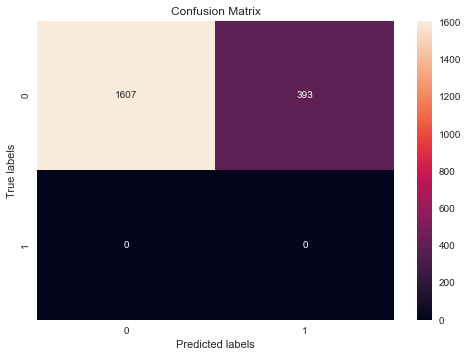

In [44]:
from sklearn.metrics import confusion_matrix
conf_nb = confusion_matrix(y_pred_hyperopttuned_xgb,y_test)
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(conf_nb, fmt='d', annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['0', '1']); ax.yaxis.set_ticklabels(['0', '1']);

[23:07:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:07:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:07:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:07:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

<module 'matplotlib.pyplot' from 'C:\\Users\\kerem\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

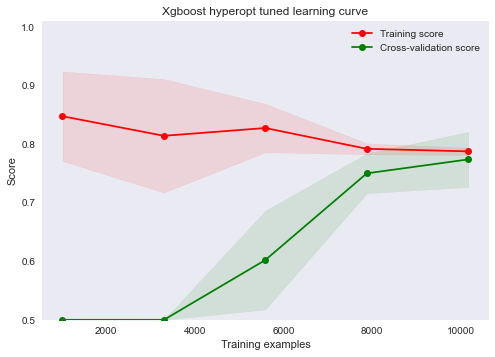

In [45]:
from sklearn.model_selection import learning_curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt
#
plot_learning_curve(model_hyperopttuned_xgb, "Xgboost hyperopt tuned learning curve", X_train, y_train, ylim=(0.5, 1.01), cv=5, n_jobs=1)

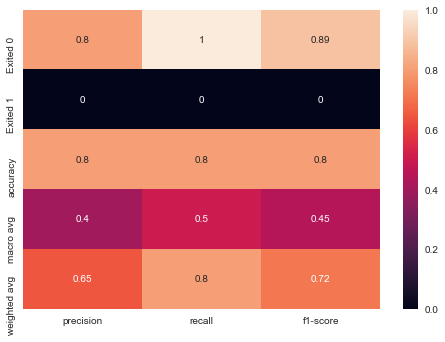

In [46]:

def plot_classification_report(cr, title='Classification report ', with_avg_total=False, cmap=plt.cm.Blues):

    lines = cr.split('\n')

    classes = []
    plotMat = []
    for line in lines[2 : (len(lines) - 3)]:
        #print(line)
        t = line.split()
        # print(t)
        classes.append(t[0])
        v = [float(x) for x in t[1: len(t) - 1]]
        print(v)
        plotMat.append(v)

    if with_avg_total:
        aveTotal = lines[len(lines) - 1].split()
        classes.append('avg/total')
        vAveTotal = [float(x) for x in t[1:len(aveTotal) - 1]]
        plotMat.append(vAveTotal)


    plt.imshow(plotMat, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    x_tick_marks = np.arange(3)
    y_tick_marks = np.arange(len(classes))
    plt.xticks(x_tick_marks, ['precision', 'recall', 'f1-score'], rotation=45)
    plt.yticks(y_tick_marks, classes)
    plt.tight_layout()
    plt.ylabel('Classes')
    plt.xlabel('Measures')
#
from sklearn.metrics import classification_report
target_names=['Exited 0','Exited 1']
classificationReport = classification_report(y_test, y_pred_hyperopttuned_xgb, target_names=target_names,output_dict=True)
sns.heatmap(pd.DataFrame(classificationReport).iloc[:-1, :].T, annot=True);

In [48]:
from sklearn.model_selection import RandomizedSearchCV

In [51]:
params = {"learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [  4, 5, 6, 8, 10, 12],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3],
 "colsample_bytree" : [ 0.3, 0.4, 0.5] }
model_rstuned_xgb = XGBClassifier(random_state=42)
model_rstuned_xgb = RandomizedSearchCV(model_rstuned_xgb,params,cv=5,n_jobs=-1)
model_rstuned_xgb = model_rstuned_xgb.fit(X_train, y_train)

[19:47:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [52]:
y_pred_rstuned_xgb = model_rstuned_xgb.predict(X_test)
predictions = [round(value) for value in y_pred_rstuned_xgb]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 78.85%


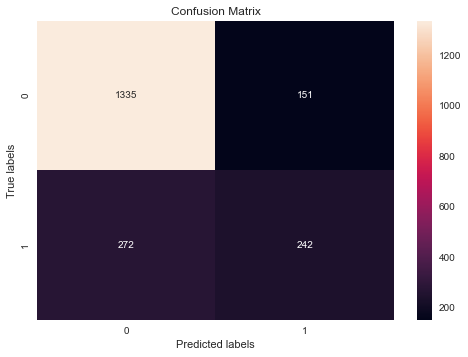

In [53]:
from sklearn.metrics import confusion_matrix
conf_nb = confusion_matrix(y_pred_rstuned_xgb,y_test)
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(conf_nb, fmt='d', annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['0', '1']); ax.yaxis.set_ticklabels(['0', '1']);

[19:47:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:47:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:47:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:48:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

<module 'matplotlib.pyplot' from 'C:\\Users\\kerem\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

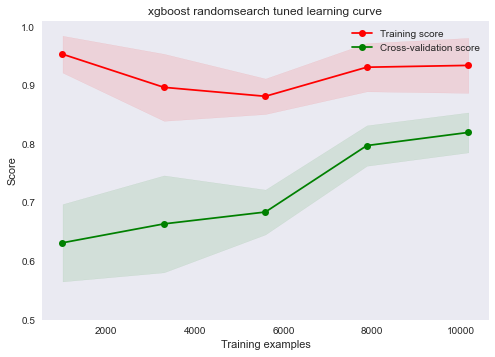

In [54]:
from sklearn.model_selection import learning_curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt
#
plot_learning_curve(model_rstuned_xgb, "xgboost randomsearch tuned learning curve", X_train, y_train, ylim=(0.5, 1.01), cv=5, n_jobs=1)